In [1]:
import numpy as np
import pandas as pd 

from pandas_datareader.data import DataReader


from datetime import datetime

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
df = pd.read_csv('/content/MSFT_data.csv')
print(df.shape)
df.head()

(1259, 7)


,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


**Adding a new Year column**

In [4]:
df['year'] = pd.DatetimeIndex(df['date']).year


**Visualizing Yearly Based Open, Close, High and Low Stocks MAX**

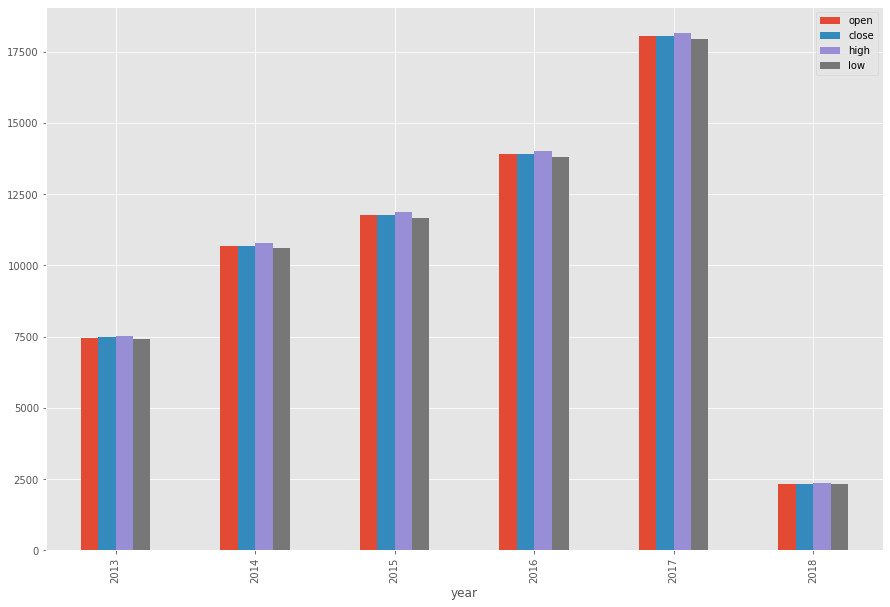

In [5]:
tempdf = df.groupby('year',as_index=False).sum()
tempdf.plot('year',['open','close','high','low'],kind = 'bar')

**Visualizing the amount of stocks sold over year**

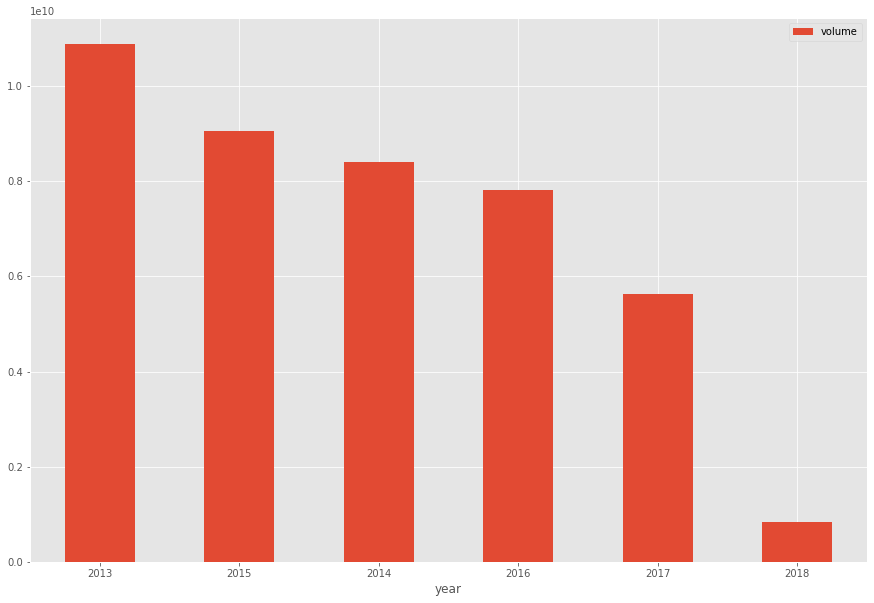

In [6]:
x = df.groupby('year').sum().sort_values('volume', ascending = False)
x.plot.bar( y='volume', rot=0)

**Visualizing the amount of data each year**

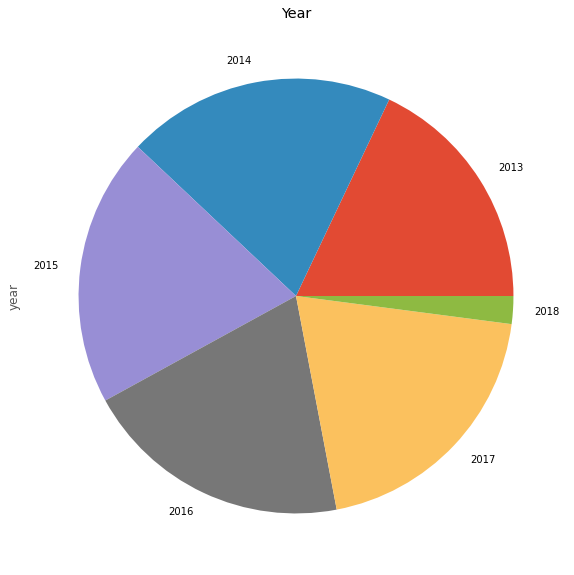

In [7]:
df.groupby('year')['year'].agg('count').plot(kind='pie',title='Year')

In [8]:
newDf = df[(df.year==2013)]
newDf.volume.sum()
s = df.year.value_counts()
x = s.to_dict()
x

{2013: 226, 2014: 252, 2015: 252, 2016: 252, 2017: 251, 2018: 26}

In [9]:
def yearlyAllocatedData(years_dict,totalSize):
    allocation = []
    for i in years_dict:
        allocation.append((100 * years_dict[i] / totalSize))
    return allocation

In [10]:
print(yearlyAllocatedData(x,len(df)))

[20.015885623510723, 20.015885623510723, 20.015885623510723, 19.936457505957108, 17.95075456711676, 2.0651310563939633]


**Filtering 2018 data since, there is very less number of data we have for that year**

In [11]:
df = df[df['year'] != 2018]
df

,date,open,high,low,close,volume,Name,year
0,2013-02-08,27.35,27.7100,27.310,27.55,33318306,MSFT,2013
1,2013-02-11,27.65,27.9200,27.500,27.86,32247549,MSFT,2013
2,2013-02-12,27.88,28.0000,27.750,27.88,35990829,MSFT,2013
3,2013-02-13,27.93,28.1100,27.880,28.03,41715530,MSFT,2013
4,2013-02-14,27.92,28.0600,27.870,28.04,32663174,MSFT,2013
...,...,...,...,...,...,...,...,...
1228,2017-12-22,85.40,85.6300,84.920,85.51,14145841,MSFT,2017
1229,2017-12-26,85.31,85.5346,85.030,85.40,9891237,MSFT,2017
1230,2017-12-27,85.65,85.9800,85.215,85.71,14678025,MSFT,2017
1231,2017-12-28,85.90,85.9300,85.550,85.72,10594344,MSFT,2017


**Grapical Visualization of  Open, Close, High and Low Stocks over Days**

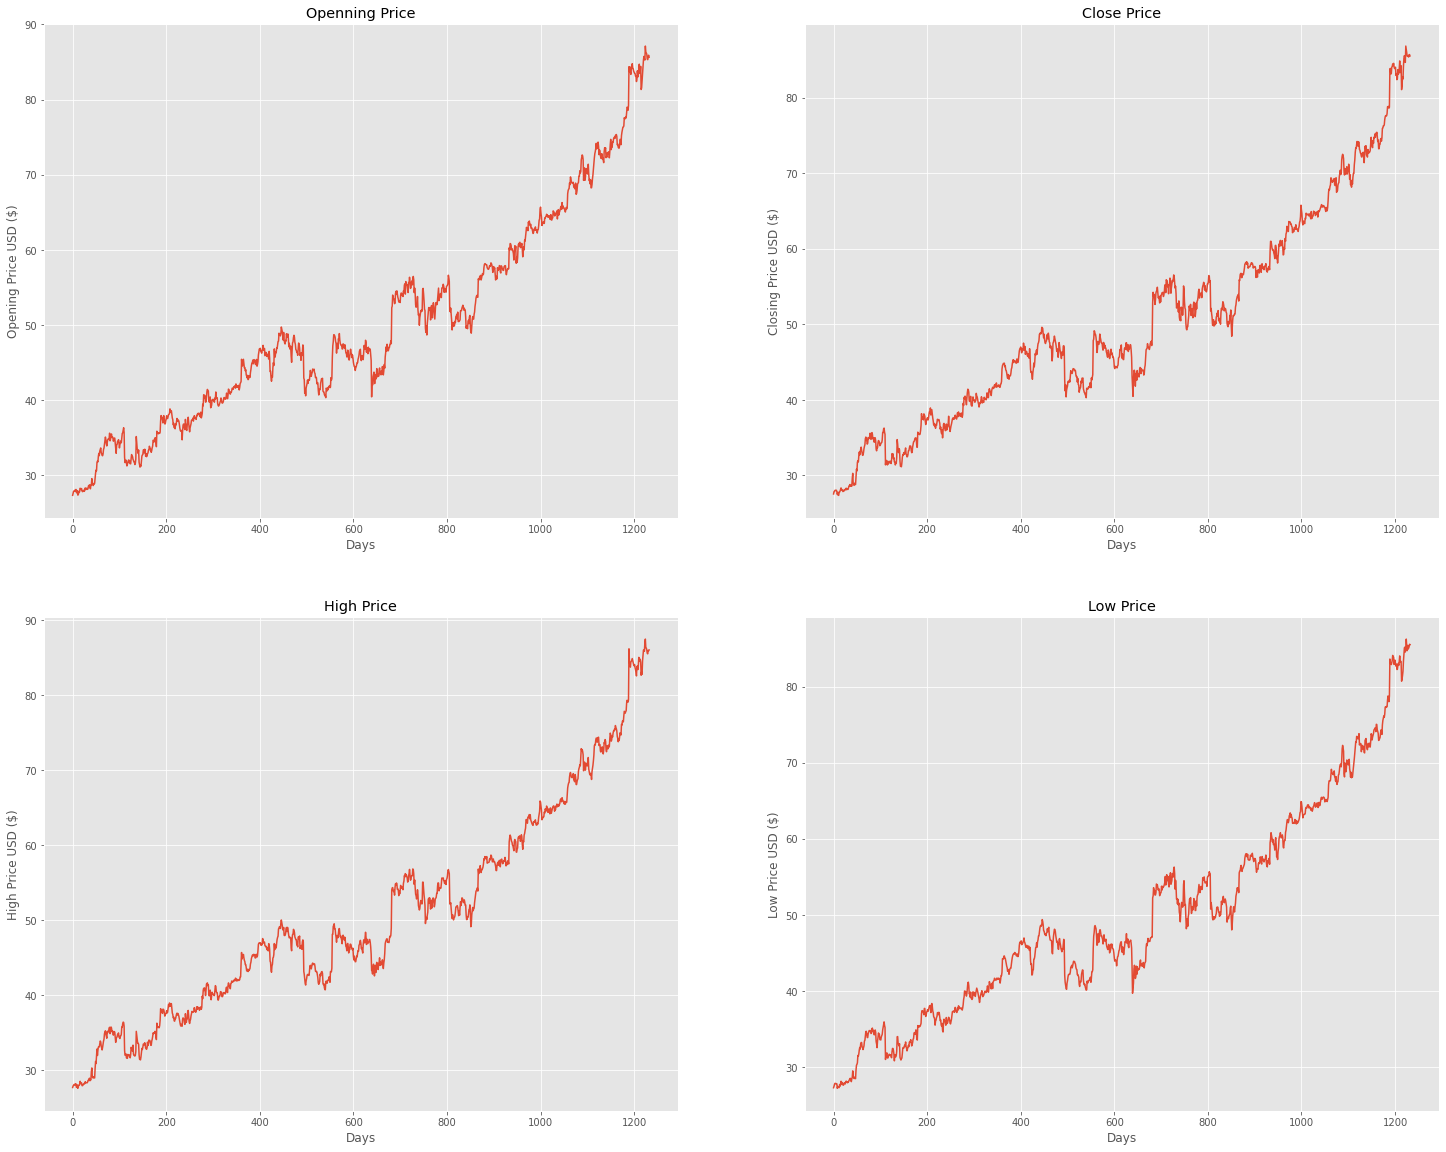

In [12]:
fig = plt.figure(figsize=(25,20))

# Visualizing the opening prices of the data.
plt.subplot(2,2,1)
plt.title('Openning Price')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])

# Visualizing the closing prices of the data.
plt.subplot(2,2,2)
plt.title('Close Price')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])

# Visualizing the high prices of the data.
plt.subplot(2,2,3)
plt.title('High Price')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])

# Visualizing the low prices of the data.
plt.subplot(2,2,4)
plt.title('Low Price')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['low'])

plt.show()

**Grapical Visualization of Date Over Open, Close, High and Low Stocks**

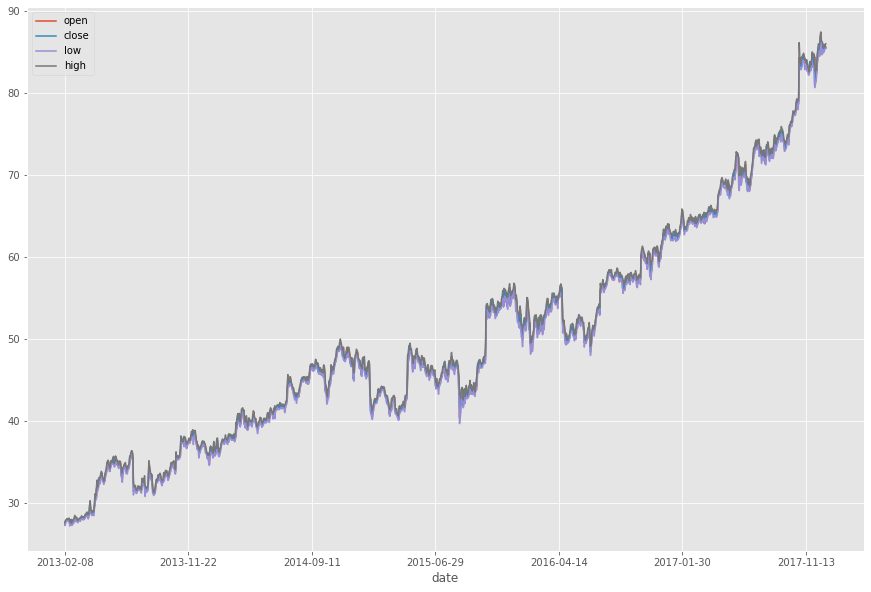

In [13]:
df.plot(kind = "line",x = 'date' , y = ['open', 'close', 'low','high'])

**Grapical Visualization of Date Over Open, Close, High and Low Stocks (*Clear Insights*)**

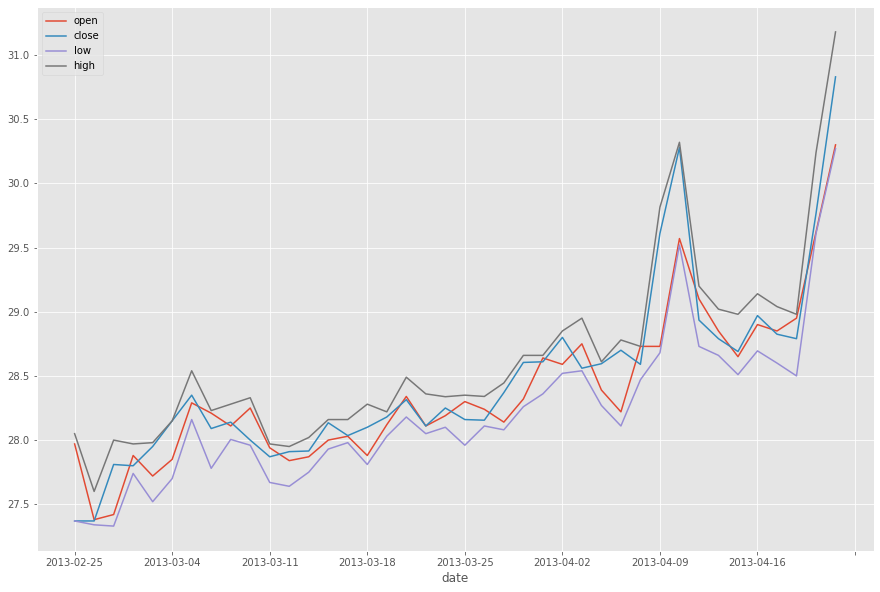

In [14]:
df[10:50].plot(kind = "line",x = 'date' , y = ['open', 'close', 'low','high'])

**Grapical Visualization of Yearly Based Open, Close, High and Low Stocks Over Month**

In [15]:
df['months'] = pd.DatetimeIndex(df['date']).month
df.head()

,date,open,high,low,close,volume,Name,year,months
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT,2013,2
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT,2013,2
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT,2013,2
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT,2013,2
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT,2013,2


In [16]:
yearly_open_Pivot = pd.pivot_table(df, values = "open", columns = "year", index = "months")
yearly_close_Pivot = pd.pivot_table(df, values = "close", columns = "year", index = "months")
yearly_high_Pivot = pd.pivot_table(df, values = "high", columns = "year", index = "months")
yearly_low_Pivot = pd.pivot_table(df, values = "low", columns = "year", index = "months")

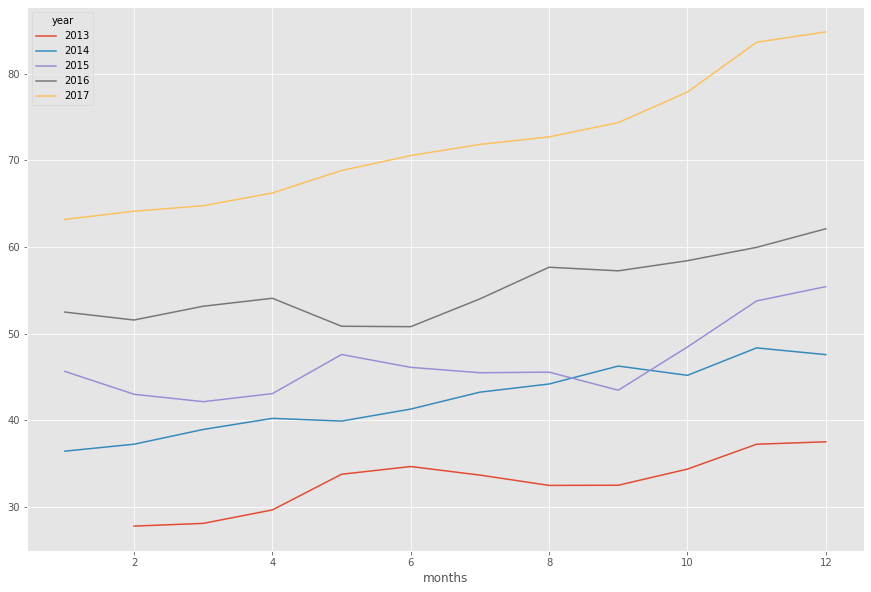

In [17]:
yearly_open_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff119822c50>,
      dtype=object)

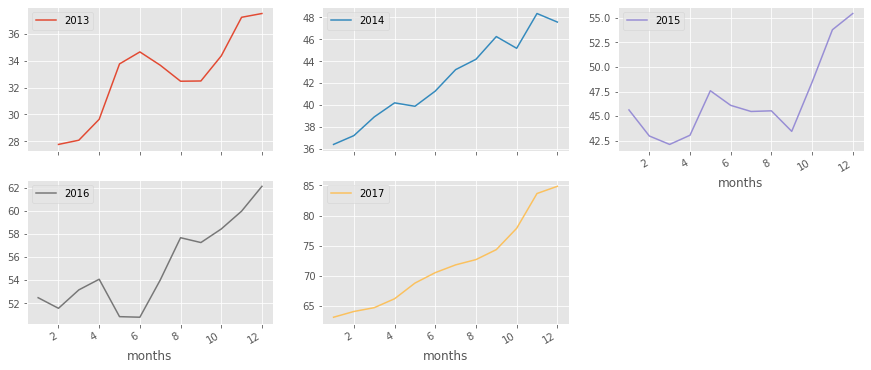

In [18]:
yearly_open_Pivot.plot(subplots = True, figsize=(15, 10), layout=(3,3))

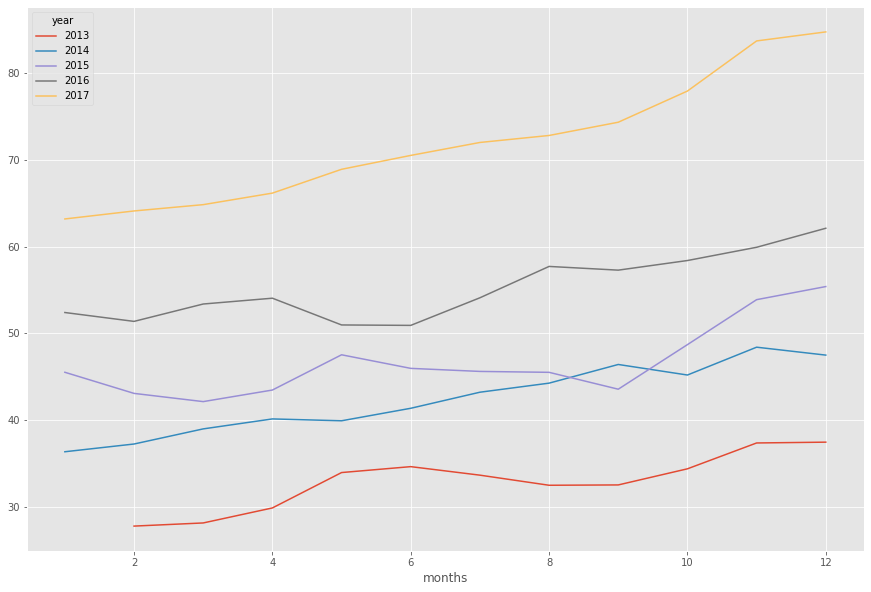

In [19]:
yearly_close_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1194646d0>,
      dtype=object)

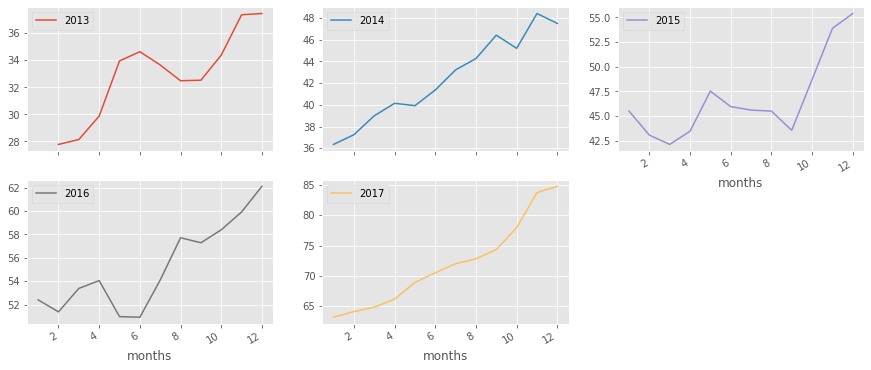

In [20]:
yearly_close_Pivot.plot(subplots = True, figsize=(15, 10), layout=(3,3))

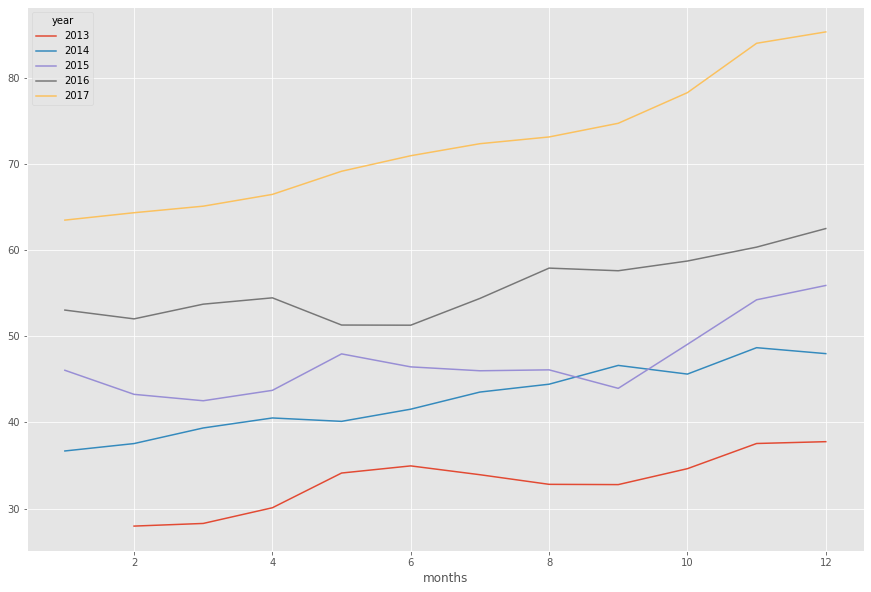

In [21]:
yearly_high_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1190b1bd0>,
      dtype=object)

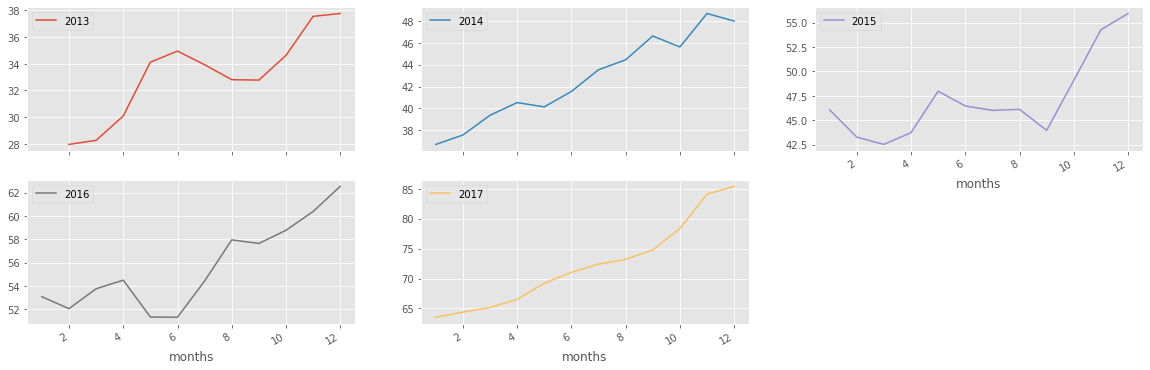

In [22]:
yearly_high_Pivot.plot(subplots = True, figsize=(20, 10), layout=(3,3))

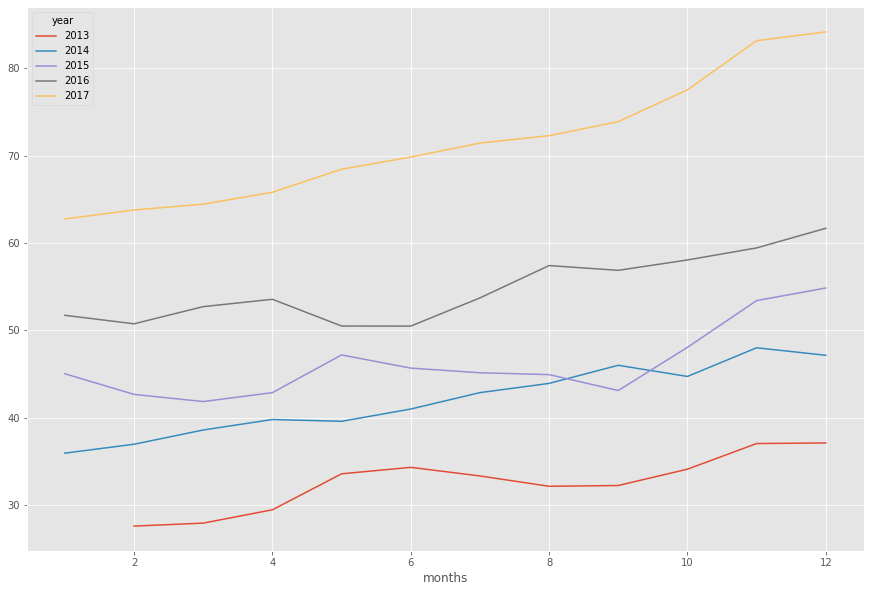

In [23]:
yearly_low_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff118ce9f10>,
      dtype=object)

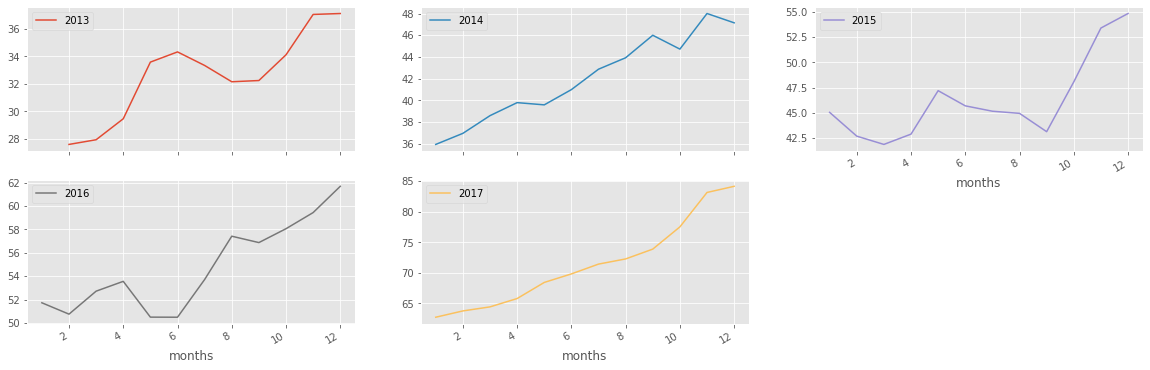

In [24]:
yearly_low_Pivot.plot(subplots = True, figsize=(20, 10), layout=(3,3))

# Predicting the closing price stock

In [25]:
df.head()

,date,open,high,low,close,volume,Name,year,months
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT,2013,2
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT,2013,2
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT,2013,2
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT,2013,2
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT,2013,2


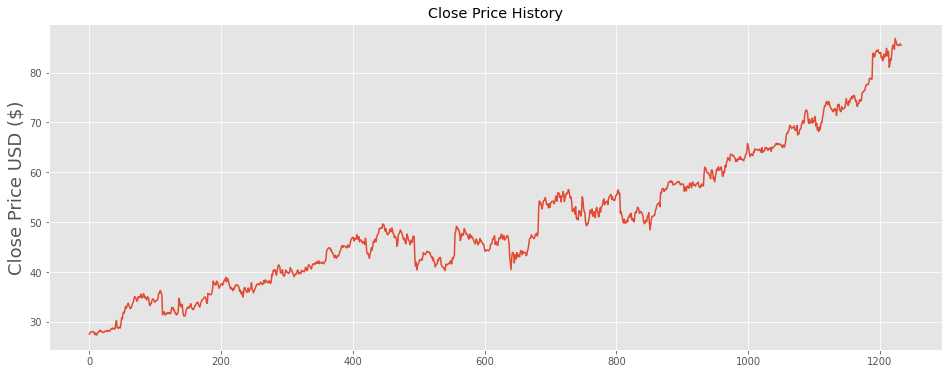

In [26]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [27]:

data = df.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1172

In [28]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00302623],
       [0.00823806],
       [0.00857431],
       ...,
       [0.98083389],
       [0.98100202],
       [0.97797579]])

In [29]:
# Create the training data set 

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        

x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.00302623, 0.00823806, 0.00857431, 0.01109617, 0.01126429,
       0.01075992, 0.01134835, 0.00840619, 0.00201748, 0.00655683,
       0.        , 0.        , 0.00739744, 0.00722932, 0.00975118,
       0.01311365, 0.01647613, 0.01210491, 0.01294553, 0.0105918 ,
       0.00840619, 0.00907868, 0.00916274, 0.01286147, 0.01118023,
       0.01227303, 0.01361802, 0.01588769, 0.01244116, 0.01479489,
       0.01328178, 0.01319771, 0.01681237, 0.02076328, 0.02084734,
       0.02404169, 0.02000672, 0.02059516, 0.02236046, 0.0205111 ,
       0.03765972, 0.04892401, 0.02631137, 0.02387357, 0.02219233,
       0.0268998 , 0.024462  , 0.02387357, 0.04026564, 0.05817081,
       0.05430397, 0.07380632, 0.07683255, 0.07431069, 0.08809684,
       0.0963349 , 0.0899462 , 0.09734364, 0.10289173, 0.10726295])]
[0.09986550100874253]

[array([0.00302623, 0.00823806, 0.00857431, 0.01109617, 0.01126429,
       0.01075992, 0.01134835, 0.00840619, 0.00201748, 0.00655683,
       0.        , 0.        , 0.00

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(x_train, y_train, batch_size=8, epochs=100)

Epoch 1/100
139/139 [==============================] - 11s 55ms/step - loss: 0.0020
Epoch 2/100
139/139 [==============================] - 7s 54ms/step - loss: 6.1750e-04
Epoch 3/100
139/139 [==============================] - 8s 54ms/step - loss: 5.3585e-04
Epoch 4/100
139/139 [==============================] - 8s 55ms/step - loss: 5.3755e-04
Epoch 5/100
139/139 [==============================] - 8s 55ms/step - loss: 5.0160e-04
Epoch 6/100
139/139 [==============================] - 8s 55ms/step - loss: 4.3323e-04
Epoch 7/100
139/139 [==============================] - 8s 55ms/step - loss: 4.2319e-04
Epoch 8/100
139/139 [==============================] - 8s 55ms/step - loss: 3.6597e-04
Epoch 9/100
139/139 [==============================] - 8s 55ms/step - loss: 3.3450e-04
Epoch 10/100
139/139 [==============================] - 8s 54ms/step - loss: 3.0611e-04
Epoch 11/100
139/139 [==============================] - 8s 54ms/step - loss: 2.8423e-04
Epoch 12/100
139/139 [======================

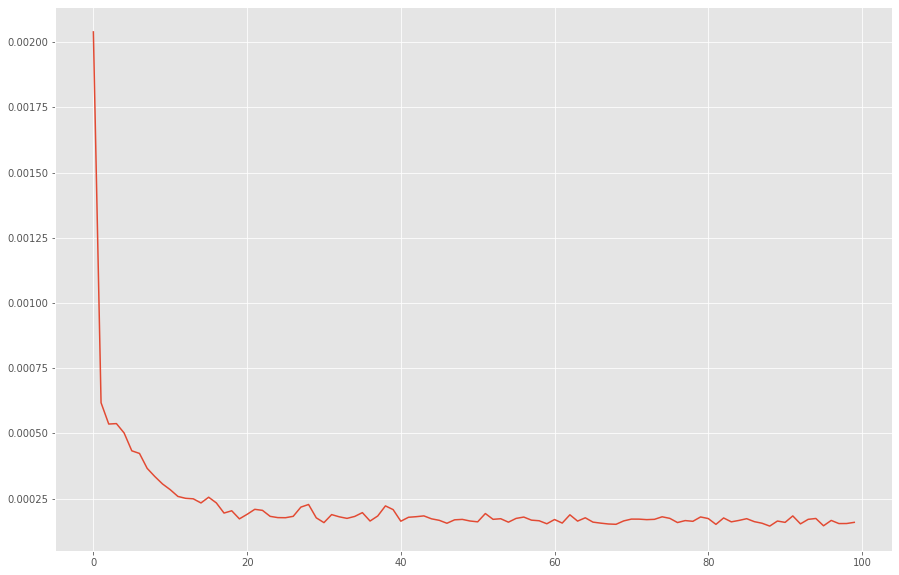

In [31]:
plt.plot(history.history['loss'])

In [32]:
# Create the testing data set

test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

x_test = np.array(x_test)


x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1.6789373806421675

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


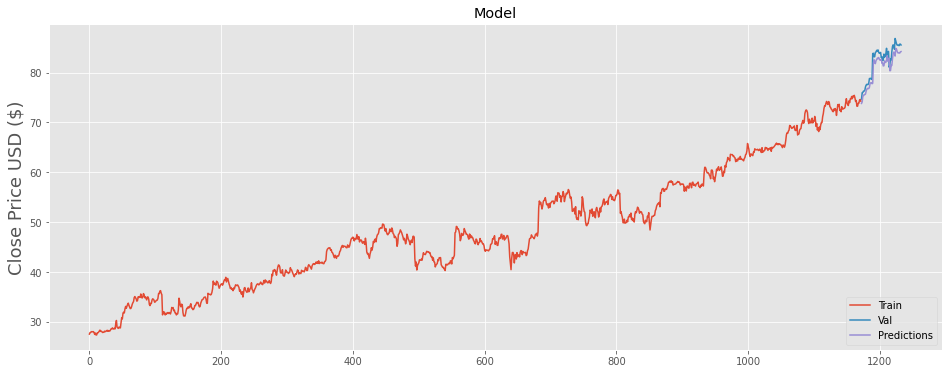

In [33]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [34]:
# Show the valid and predicted prices
valid

,close,Predictions
1172,74.69,73.817162
1173,75.97,74.113503
1174,76.00,75.234528
1175,76.29,75.380508
1176,76.29,75.595078
...,...,...
1228,85.51,83.935402
1229,85.40,83.967056
1230,85.71,83.913216
1231,85.72,84.162689
